<a href="https://colab.research.google.com/github/MariusMC8/Thesis-coding/blob/main/Mock_risk_ranking_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas matplotlib

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_ESP_1.json"
regions = gpd.read_file(url)

In [ ]:
# Show the column names to understand the structure
regions.columns

Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')

In [ ]:
# List all unique region names in the shapefile
regions['NAME_1'].unique()

array(['Andalucía', 'Aragón', 'Cantabria', 'Castilla-LaMancha',
       'CastillayLeón', 'Cataluña', 'CeutayMelilla', 'ComunidaddeMadrid',
       'ComunidadForaldeNavarra', 'ComunidadValenciana', 'Extremadura',
       'Galicia', 'IslasBaleares', 'IslasCanarias', 'LaRioja',
       'PaísVasco', 'PrincipadodeAsturias', 'RegióndeMurcia'],
      dtype=object)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mock risk-ranking map data3.csv to Mock risk-ranking map data3.csv


In [ ]:
data = pd.read_csv("Mock risk-ranking map data3.csv", decimal=".", encoding='latin1')
data.head()

,Storage ID;Coordinates;Storage type;Region;Importance score;Mean Temperature 1991-2020;Mean Temperature 1991-2020 strength;Current vulnerability score;Mean temperature change 1991-2020 and 2011-2040 RCP4.5;Exposure score;Future vulnerability score;Mean Temperature 2011-2040 RCP4.5;Mean Temperature 2011-2040 RCP4.5 strength;Risk present (h. strength x current vulne x importance);Risk future (h. strength x future vulne x importance);Change in risk
Garcia Salom;41.980000,2.820000;Battery;Cataluña;1;13.29;1;1;0.54;2;...
Sancholl;39.470000,-0.380000;Battery;ComunidadValenciana;1;15.68...
Malpica;43.320000,-8.810000;Battery;Galicia;1;12.54;1;1;0.43;1;...
Tanes;43.220000,-5.430000;PHS;PrincipadodeAsturias;3;11.61;1;...
Aguayo Aguilar;42.790000,-4.290000;PHS;Cantabria;3;12.10;1;1;0.45;1;2;...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Garcia Salom;41.980000  to Lanzarote PowerStore;28.960000 
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
# Load with correct separator and decimal handling
data = pd.read_csv(
    "Mock risk-ranking map data3.csv",
    sep=";",            # semicolon-separated
    engine="python",     # allows more flexible parsing
    encoding='latin-1' # Added encoding
)

# Fix numbers with stray tabs/spaces and commas
data["Mean Temperature 2011-2040 RCP4.5"] = (
    data["Mean Temperature 2011-2040 RCP4.5"]
    .astype(str)
    .str.replace(r"[^\d,.-]", "", regex=True)  # remove stray spaces/tabs
    .str.replace(",", ".", regex=False)        # replace commas with dots
    .astype(float)
)

data["Mean Temperature 1991-2020"] = (
    data["Mean Temperature 1991-2020"]
    .astype(str)
    .str.replace(r"[^\d,.-]", "", regex=True)  # remove stray spaces/tabs
    .str.replace(",", ".", regex=False)        # replace commas with dots
    .astype(float)
)

data.dropna(axis=0, inplace=True)

data.info()
data.head(18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Storage ID                                               16 non-null     object 
 1   Coordinates                                              16 non-null     object 
 2   Storage type                                             16 non-null     object 
 3   Region                                                   16 non-null     object 
 4   Importance score                                         16 non-null     int64  
 5   Mean Temperature 1991-2020                               16 non-null     float64
 6   Mean Temperature 1991-2020 strength                      16 non-null     int64  
 7   Current vulnerability score                              16 non-null     int64  
 8   Mean temperature change 1991-202

,Storage ID,Coordinates,Storage type,Region,Importance score,Mean Temperature 1991-2020,Mean Temperature 1991-2020 strength,Current vulnerability score,Mean temperature change 1991-2020 and 2011-2040 RCP4.5,Exposure score,Future vulnerability score,Mean Temperature 2011-2040 RCP4.5,Mean Temperature 2011-2040 RCP4.5 strength,Risk present (h. strength x current vulne x importance),Risk future (h. strength x future vulne x importance),Change in risk
0,Garcia Salom,"41.980000 , 2.820000",Battery,Cataluña,1,13.29,1,1,0.54,2,3,13.74,1,1,3,2
1,Sancholl,"39.470000 , -0.380000",Battery,ComunidadValenciana,1,15.68,2,1,0.53,2,3,16.11,2,2,6,4
2,Malpica,"43.320000 , -8.810000",Battery,Galicia,1,12.54,1,1,0.43,1,2,12.98,1,1,2,1
3,Tanes,"43.220000 , -5.430000",PHS,PrincipadodeAsturias,3,11.61,1,1,0.45,1,2,12.04,1,3,6,3
4,Aguayo Aguilar,"42.790000 , -4.290000",PHS,Cantabria,3,12.10,1,1,0.45,1,2,12.52,1,3,6,3
5,Bat Hernani,"43.270000 , -1.970000",Battery,PaísVasco,1,12.72,1,1,0.45,1,2,13.11,1,1,2,1
6,Tudela,"42.060000 , -1.600000",Battery,ComunidadForaldeNavarra,1,12.40,1,1,0.51,2,3,12.80,1,1,3,2
7,Ip y Urdiceto,"42.670000 , 0.280000",PHS,Aragón,3,12.71,1,1,0.57,2,3,13.16,1,3,9,6
8,Donally corporate,"41.685769 , -5.942315",Battery,CastillayLeón,1,11.73,1,1,0.54,2,3,12.23,1,1,3,2
9,Erasmo,"38.990000 , -3.930000",Battery,Castilla-LaMancha,1,14.29,2,1,0.58,2,3,14.77,2,2,6,4


In [ ]:
# Split coordinates into latitude and longitude
data[['lat','lon']] = data['Coordinates'].str.split(',', expand=True).astype(float)

In [ ]:
# Convert coordinates to geodataframe
points = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data['lon'], data['lat']),
    crs="EPSG:4326" )

In [ ]:
# Ensure numeric columns
cols_to_numeric = [
    'Mean Temperature 1991-2020 strength',
    'Mean Temperature 2011-2040 RCP4.5 strength',
    'Current vulnerability score', 'Importance score', 'Exposure score', 'Future vulnerability score'
]
for col in cols_to_numeric:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [ ]:
# --- CALCULATE CURRENT RISK (1991–2020) ---
data['risk_current'] = (
    data['Mean Temperature 1991-2020 strength'] *
    data['Current vulnerability score'] *
    data['Importance score'] )
points = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['lon'], data['lat']), crs="EPSG:4326")

In [ ]:
# CALCULATE FUTURE RISK (2011-2040, RCP4.5)
data['risk_future'] = (
    data['Mean Temperature 2011-2040 RCP4.5 strength'] *
    data['Future vulnerability score'] *
    data['Importance score'] )
points = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['lon'], data['lat']), crs="EPSG:4326")

In [ ]:
#Calculate risk change
data['risk_change_RCP45'] = data['risk_future'] - data['risk_current']

In [ ]:
points = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data['lon'], data['lat']), crs="EPSG:4326"
)

In [ ]:
print(data['risk_current'])
print(data['risk_future'])
print(data['risk_change_RCP45'])

0     1
1     2
2     1
3     3
4     3
5     1
6     1
7     3
8     1
9     2
10    6
11    3
12    2
13    2
14    3
15    6
Name: risk_current, dtype: int64
0      3
1      6
2      2
3      6
4      6
5      2
6      3
7      9
8      3
9      6
10    18
11     6
12     6
13     6
14     6
15    12
Name: risk_future, dtype: int64
0      2
1      4
2      1
3      3
4      3
5      1
6      2
7      6
8      2
9      4
10    12
11     3
12     4
13     4
14     3
15     6
Name: risk_change_RCP45, dtype: int64


In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [ ]:
#Normalise and create colour map for risk values
norm = mcolors.Normalize(vmin=data['risk_current'].min(), vmax=data['risk_current'].max())
cmap = cm.ScalarMappable(norm=norm, cmap='Reds')

KeyError: 'Type'

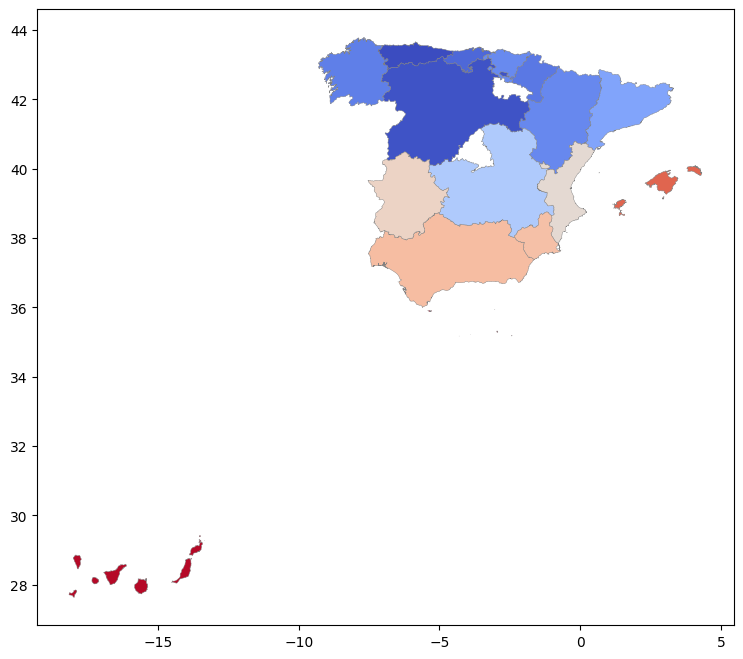

In [ ]:
#DON'T USE
# Function for plotting
def plot_map(temp_col, risk_col, title, vmin=None, vmax=None):
  fig, ax = plt.subplots(figsize=(10, 8))

  # Merge temperature data with regions for plotting background
  merged_regions_temp = regions.merge(data[['Region', temp_col]], left_on="NAME_1", right_on="Region", how="left")

  # Background = regional mean temperature
  merged_regions_temp.plot(column=temp_col, cmap="coolwarm", legend=False, ax=ax, edgecolor='grey', linewidth=0.3)

  #Colour normalisation for risk values
  if vmin is None:
      vmin = points[risk_col].min()
  if vmax is None:
      vmax = points[risk_col].max()
  norm_risk = mcolors.Normalize(vmin=2, vmax=6)


  #Overlay storage facilities
  markers = {'PHS': 'o', 'Battery': 's', 'Flywheel': '^'}
  for t, marker in markers.items():
    subset = points[points['Type'] == t]
    subset.plot(
        ax=ax,
        marker=marker,
        c=subset[risk_col],
        cmap='Reds',
        norm=norm_risk,
        markersize=80,
        label=t,
        edgecolor='black' )

  # Add text labels to the points
  for i, row in points.iterrows():
      # Check if the risk value is not NaN before adding text
      if pd.notna(row[risk_col]):
          ax.text(row.geometry.x + 0.1, row.geometry.y, f"{row[risk_col]:.1f}", fontsize=8)


  #Add colour bar for temperature (right side)
  sm_temp = cm.ScalarMappable(
        norm=plt.Normalize(
            vmin=merged_regions_temp[temp_col].min(),
            vmax=merged_regions_temp[temp_col].max()
        ),
        cmap='coolwarm'
    )
  cbar_temp = fig.colorbar(sm_temp, ax=ax, fraction=0.03, pad=0.02, shrink=0.8)
  cbar_temp.set_label('Mean Temperature (°C)', fontsize=11)

  #Add colour bar for risk values (bottom)
  sm_risk = cm.ScalarMappable(norm=norm_risk, cmap='Reds')
  cbar_risk = fig.colorbar(sm_risk, ax=ax, orientation='horizontal', fraction=0.05, pad=0.08, shrink=0.7)
  cbar_risk.set_label('Risk Level', fontsize=11)

  plt.legend(title="Storage Type", loc='lower right')
  plt.title(title, fontsize=14)
  plt.axis('off')
  plt.show()

# Update the points GeoDataFrame to include the calculated risk columns
points = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data['lon'], data['lat']), crs="EPSG:4326"
)

#Map 1: Current risk
plot_map( temp_col='Mean Temperature 1991-2020',
         risk_col='risk_current',
          title='Electricity Storage Mean Temperature Risk (1991–2020)' )

#Map 2: Future risk
plot_map( temp_col='Mean Temperature 2011-2040 RCP4.5',
         risk_col='risk_future',
          title='Electricity Storage Mean Temperature Risk (2011–2040, RCP4.5)')

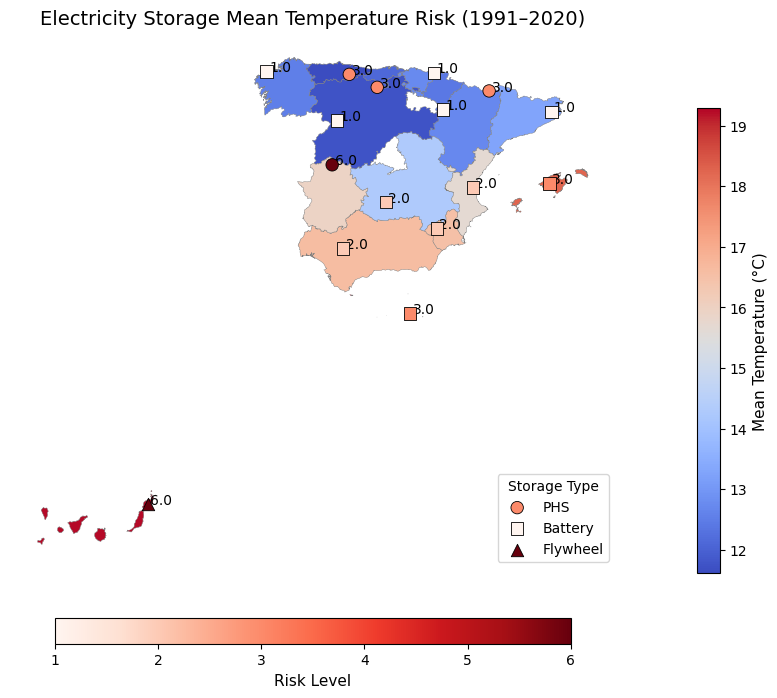

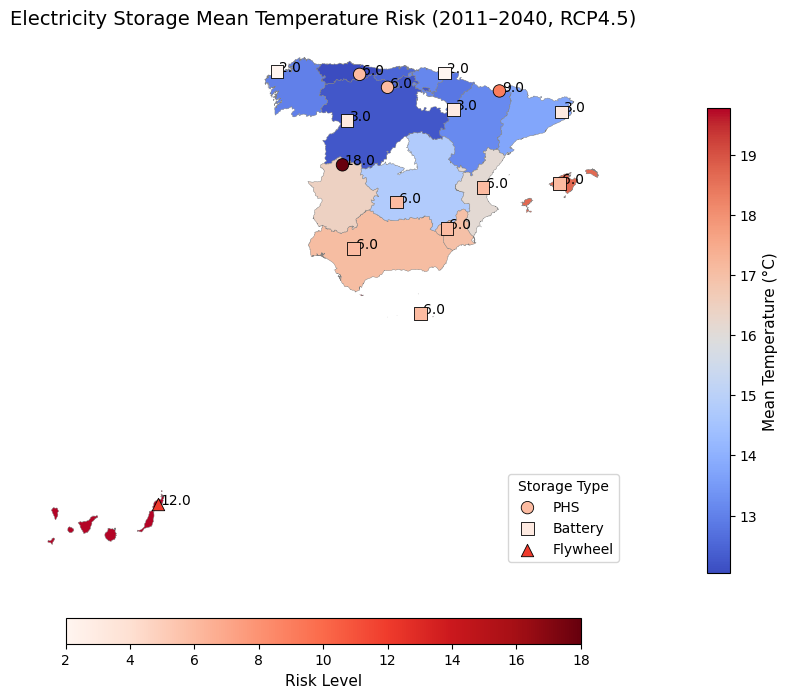

In [ ]:
# Function for plotting 1
def plot_map(temp_col, risk_col, title, temp_change=False):
  fig, ax = plt.subplots(figsize=(10, 8))

  # Merge temperature data with regions for plotting background
  merged_regions_temp = regions.merge(data[['Region', temp_col]], left_on="NAME_1", right_on="Region", how="left")

  # Background = regional mean temperature
  merged_regions_temp.plot(column=temp_col, cmap="coolwarm", legend=False, ax=ax, edgecolor='grey', linewidth=0.3)

# --- BEFORE the overlay, compute shared norm for the risk_col ---
# use points[risk_col] (ensure it's numeric)
  vals = points[risk_col].to_numpy(dtype=float)
# decide vmin/vmax. For change maps we want symmetric range around 0:
  if temp_change:
    abs_max = max(abs(vals.min()), abs(vals.max()))
    vmin, vmax = -abs_max, abs_max
    norm_risk = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
    cmap_risk = 'RdBu_r'
  else:
    vmin, vmax = vals.min(), vals.max()
    norm_risk = mcolors.Normalize(vmin=vmin, vmax=vmax)
    cmap_risk = 'Reds'


  #Overlay storage facilities
  markers = {'PHS': 'o', 'Battery': 's', 'Flywheel': '^'}
  # plotting order: put larger markers first if you want them behind
  for t, marker in markers.items():
    subset = points[points['Storage type'] == t].copy()
    if subset.empty:
       continue
    xs = subset.geometry.x.values
    ys = subset.geometry.y.values
    cs = subset[risk_col].astype(float).values  # colour values

    sc = ax.scatter(
        xs, ys,
        c=cs,
        cmap=cmap_risk,
        norm=norm_risk,
        marker=marker,
        s=80,               # control marker size here
        edgecolor='black',
        linewidth=0.6,
        label=t,
        zorder=5
    )
# keep reference to the ScalarMappable for the colorbar
  sm_for_colorbar = sc

  # Add text labels to the points
  for i, row in points.iterrows():
      # Check if the risk value is not NaN before adding text
      if pd.notna(row[risk_col]):
          ax.text(row.geometry.x + 0.1, row.geometry.y, f"{row[risk_col]:.1f}", fontsize=10)


  #Add colour bar for temperature (right side)
  sm_temp = cm.ScalarMappable(
        norm=plt.Normalize(
            vmin=merged_regions_temp[temp_col].min(),
            vmax=merged_regions_temp[temp_col].max()
        ),
        cmap='coolwarm'
    )
  cbar_temp = fig.colorbar(sm_temp, ax=ax, fraction=0.03, pad=0.02, shrink=0.8)
  cbar_temp.set_label('Mean Temperature (°C)', fontsize=11)

  #Add colour bar for risk values (bottom)
  sm_risk = cm.ScalarMappable(norm=norm_risk, cmap=cmap_risk)
  sm_risk.set_array([])   # necessary in some Matplotlib versions
  cbar_risk = fig.colorbar(sm_risk, ax=ax, orientation='horizontal',
                         fraction=0.05, pad=0.08, shrink=0.7)
  cbar_risk.set_label('Change in Risk Level' if temp_change else 'Risk Level', fontsize=11)

  plt.legend(title="Storage Type", loc='lower right')
  plt.title(title, fontsize=14)
  plt.axis('off')
  plt.show()

# Update the points GeoDataFrame to include the calculated risk columns
points = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data['lon'], data['lat']), crs="EPSG:4326"
)

#Map 1: Curreny risk
plot_map( temp_col='Mean Temperature 1991-2020',
         risk_col='risk_current',
          title='Electricity Storage Mean Temperature Risk (1991–2020)' )

#Map 2: Future risk
plot_map( temp_col='Mean Temperature 2011-2040 RCP4.5',
         risk_col='risk_future',
          title='Electricity Storage Mean Temperature Risk (2011–2040, RCP4.5)')

In [ ]:
print(points['risk_current'].describe())

count    16.000000
mean      2.500000
std       1.591645
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       6.000000
Name: risk_current, dtype: float64


In [ ]:
#DON'T USE
# Make sure you have this column in your dataframe first
data['risk_change_RCP45'] = data['risk_future'] - data['risk_current']

# Update the points GeoDataFrame to include the new risk_change_RCP45 column
points = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['lon'], data['lat']), crs="EPSG:4326")


# Function for plotting
def plot_map(temp_col, risk_col, title, temp_change=False):
  fig, ax = plt.subplots(figsize=(10, 8))

  # Merge temperature data with regions for plotting background
  merged_regions_temp = regions.merge(data[['Region', temp_col]], left_on="NAME_1", right_on="Region", how="left")

  # Determine colormap based on whether it's a temperature change map
  cmap_bg = "coolwarm" if not temp_change else "Purples"

  # Background = regional mean temperature
  merged_regions_temp.plot(column=temp_col, cmap=cmap_bg, legend=False, ax=ax, edgecolor='grey', linewidth=0.3)

  # Calculate vmin, vmax and norm for risk
  vmin = points[risk_col].min()
  vmax = points[risk_col].max()

  if temp_change:
      # For risk change, ensure vmin and vmax are symmetric around 0 for the diverging colormap
      abs_max = max(abs(vmin), abs(vmax))
      norm_risk = mcolors.TwoSlopeNorm(vmin=-abs_max, vcenter=0, vmax=abs_max)
  else:
      norm_risk = mcolors.Normalize(vmin=vmin, vmax=vmax)


  #Overlay storage facilities
  markers = {'PHS': 'o', 'Battery': 's', 'Flywheel': '^'}
  for t, marker in markers.items():
    subset = points[points['Type'] == t]
    subset.plot(
        ax=ax,
        marker=marker,
        c=subset[risk_col],
        cmap='RdBu_r' if temp_change else 'Reds', # Use RdBu_r for risk change, Reds otherwise
        norm=norm_risk,
        markersize=80,
        label=t,
        edgecolor='black' )

  #Add colour bar for temperature (right side)
  sm_temp = cm.ScalarMappable(
        norm=plt.Normalize(
            vmin=merged_regions_temp[temp_col].min(),
            vmax=merged_regions_temp[temp_col].max()
        ),
        cmap=cmap_bg # Use the variable cmap_bg
    )
  cbar_temp = fig.colorbar(sm_temp, ax=ax, fraction=0.03, pad=0.02, shrink=0.8)
  cbar_temp.set_label('Temperature change (°C)' if temp_change else 'Mean Temperature (°C)', fontsize=11)

  #Add colour bar for risk values (bottom)
  sm_risk = cm.ScalarMappable(norm=norm_risk, cmap='RdBu_r' if temp_change else 'Reds')   # Use RdBu_r for risk change, Reds otherwise
  cbar_risk = fig.colorbar(sm_risk, ax=ax, orientation='horizontal', fraction=0.05, pad=0.08, shrink=0.7)
  cbar_risk.set_label('Change in Risk Level' if temp_change else 'Risk Level', fontsize=11)

  plt.legend(title="Storage Type", loc='lower right')
  plt.title(title, fontsize=14)
  plt.axis('off')
  plt.show()

#Map 3: Future risk with temperature change background
plot_map(
    temp_col='Mean temperature change 1991-2020 and 2011-2040 RCP4.5',
    risk_col='risk_change_RCP45',
    title='Electricity Storage Changing Mean Temperature Risk (2011–2040, RCP4.5)',
    temp_change=True
)

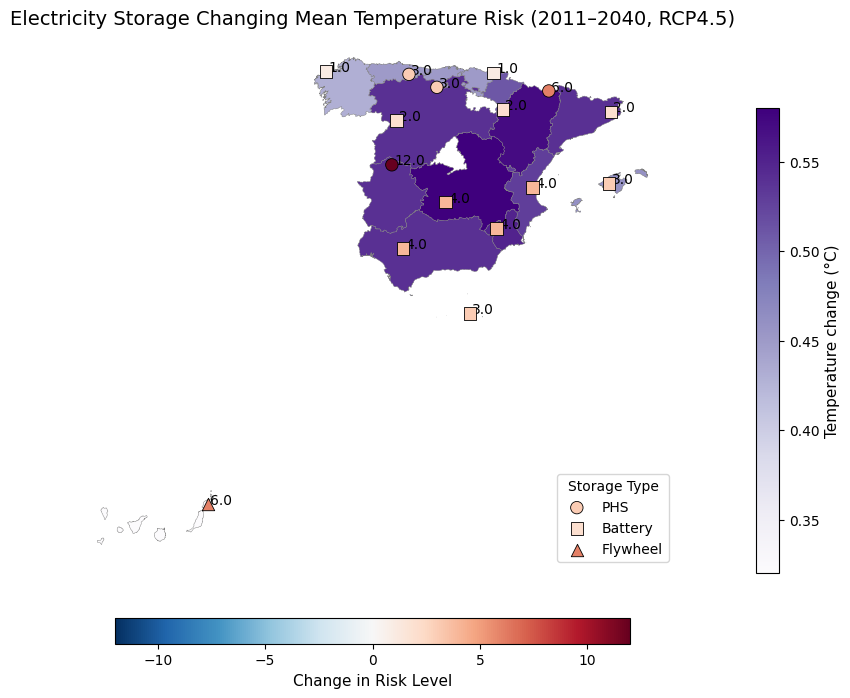

In [ ]:
# Make sure you have this column in your dataframe first 1
data['risk_change_RCP45'] = data['risk_future'] - data['risk_current']

# Update the points GeoDataFrame to include the new risk_change_RCP45 column
points = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['lon'], data['lat']), crs="EPSG:4326")


# Function for plotting
def plot_map(temp_col, risk_col, title, temp_change=False):
  fig, ax = plt.subplots(figsize=(10, 8))

  # Merge temperature data with regions for plotting background
  merged_regions_temp = regions.merge(data[['Region', temp_col]], left_on="NAME_1", right_on="Region", how="left")

  # Determine colormap based on whether it's a temperature change map
  cmap_bg = "coolwarm" if not temp_change else "Purples"

  # Background = regional mean temperature
  merged_regions_temp.plot(column=temp_col, cmap=cmap_bg, legend=False, ax=ax, edgecolor='grey', linewidth=0.3)

  # --- BEFORE the overlay, compute shared norm for the risk_col ---
  # use points[risk_col] (ensure it's numeric)
  vals = points[risk_col].to_numpy(dtype=float)
  # decide vmin/vmax. For change maps we want symmetric range around 0:
  if temp_change:
    abs_max = max(abs(vals.min()), abs(vals.max()))
    vmin, vmax = -abs_max, abs_max
    norm_risk = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
    cmap_risk = 'RdBu_r'
  else:
    vmin, vmax = vals.min(), vals.max()
    norm_risk = mcolors.Normalize(vmin=vmin, vmax=vmax)
    cmap_risk = 'Reds'

  if temp_change:
      # For risk change, ensure vmin and vmax are symmetric around 0 for the diverging colormap
      abs_max = max(abs(vmin), abs(vmax))
      norm_risk = mcolors.TwoSlopeNorm(vmin=-abs_max, vcenter=0, vmax=abs_max)
  else:
      norm_risk = mcolors.Normalize(vmin=vmin, vmax=vmax)


  #Overlay storage facilities
  markers = {'PHS': 'o', 'Battery': 's', 'Flywheel': '^'}
  # plotting order: put larger markers first if you want them behind
  for t, marker in markers.items():
    subset = points[points['Storage type'] == t].copy()
    if subset.empty:
       continue
    xs = subset.geometry.x.values
    ys = subset.geometry.y.values
    cs = subset[risk_col].astype(float).values  # colour values

    sc = ax.scatter(
        xs, ys,
        c=cs,
        cmap=cmap_risk,
        norm=norm_risk,
        marker=marker,
        s=80,               # control marker size here
        edgecolor='black',
        linewidth=0.6,
        label=t,
        zorder=5
    )
# keep reference to the ScalarMappable for the colorbar
  sm_for_colorbar = sc

 # Add text labels to the points
  for i, row in points.iterrows():
      # Check if the risk value is not NaN before adding text
      if pd.notna(row[risk_col]):
          ax.text(row.geometry.x + 0.1, row.geometry.y, f"{row[risk_col]:.1f}", fontsize=10)

  #Add colour bar for temperature (right side)
  sm_temp = cm.ScalarMappable(
        norm=plt.Normalize(
            vmin=merged_regions_temp[temp_col].min(),
            vmax=merged_regions_temp[temp_col].max()
        ),
        cmap=cmap_bg # Use the variable cmap_bg
    )
  cbar_temp = fig.colorbar(sm_temp, ax=ax, fraction=0.03, pad=0.02, shrink=0.8)
  cbar_temp.set_label('Temperature change (°C)' if temp_change else 'Mean Temperature (°C)', fontsize=11)

  #Add colour bar for risk values (bottom)
  sm_risk = cm.ScalarMappable(norm=norm_risk, cmap=cmap_risk)
  sm_risk.set_array([])   # necessary in some Matplotlib versions
  cbar_risk = fig.colorbar(sm_risk, ax=ax, orientation='horizontal',
                         fraction=0.05, pad=0.08, shrink=0.7)
  cbar_risk.set_label('Change in Risk Level' if temp_change else 'Risk Level', fontsize=11)

  plt.legend(title="Storage Type", loc='lower right')
  plt.title(title, fontsize=14)
  plt.axis('off')
  plt.show()

#Map 3: Future risk with temperature change background
plot_map(
    temp_col='Mean temperature change 1991-2020 and 2011-2040 RCP4.5',
    risk_col='risk_change_RCP45',
    title='Electricity Storage Changing Mean Temperature Risk (2011–2040, RCP4.5)',
    temp_change=True
)

In [ ]:
# Merge with regions
merged = regions.merge(data, left_on="NAME_1", right_on="Region", how="left")

In [ ]:
# Fix mismatched region names for Spanish regions
name_mapping = {
    'ComunidadValencia': 'ComunidadValenciana',}
merged['NAME_1'] = merged['NAME_1'].replace(name_mapping)

In [ ]:
# MAP 1: ASSEST-SPECIFIC (Current risk per storage type)
storage_types = data['Type'].unique()

for s_type in storage_types:
    subset = data[data['Type'] == s_type]
    merged_subset = regions.merge(subset, left_on="NAME_1", right_on="Region", how="left")
    fig, ax = plt.subplots(figsize=(10, 8))
    merged_subset.plot(column="risk_current", cmap="Reds", legend=True, ax=ax)
    ax.set_title(f"Current Risk Mean Temperature (1991–2020) for {s_type} Storage", fontsize=14)
    plt.axis("off")
    plt.show()

In [ ]:
# MAP 2: Climate-specific (future risk under RCP4.5 scenario)
for scenario, risk_col in [('RCP4.5', 'risk_future')]: # Corrected risk_col name
    if risk_col in data.columns:
        fig, ax = plt.subplots(figsize=(10, 8))
        merged.plot(column=risk_col, cmap="Reds", legend=True, ax=ax)
        ax.set_title(f"Future Risk (2011–2040 RCP4.5)", fontsize=14)
        plt.axis("off")
        plt.show()

In [ ]:
data = data.rename(columns={
    "Storage ID": "storage_id",
    "Type": "type",
    "Importance score": "importance_score",
    "Region": "region",
    "Mean Temperature 2011-2040": "mean_temp",
    "Risk score": "risk_score"
})
data.head(20)

In [ ]:
# --- MERGE REGION DATA ---
merged = regions.merge(data, left_on="NAME_1", right_on="region", how="left")

In [ ]:
# --- PLOT MAP USING PRE-COMPUTED RISK SCORE ---
merged = regions.merge(data, left_on="NAME_1", right_on="region", how="left")

fig, ax = plt.subplots(figsize=(10, 8))
merged.plot(column="risk_score", cmap="Reds", legend=True, ax=ax)
ax.set_title("Regional Risk Ranking of Energy Storage for Mean Temperature", fontsize=14)
plt.axis("off")
plt.show()

In [ ]:
#One map per storage type
storage_types = data['type'].unique()

for s_type in storage_types:
    subset = data[data['type'] == s_type]
    merged_subset = regions.merge(subset, left_on="NAME_1", right_on="region", how="left")

    fig, ax = plt.subplots(figsize=(10, 8))
    merged_subset.plot(column="risk_score", cmap="Reds", legend=True, ax=ax)
    ax.set_title(f"Regional Risk Ranking for {s_type} Storage", fontsize=14)
    plt.axis("off")
    plt.show()